In [45]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [46]:
data=pd.read_csv("training_reduced.csv")

In [47]:
del data[' WardsPlaced']

In [48]:
data.head()

,Win,FirstBlood,firstTower,firstTowerAssist,Kills,Assists,Deaths,GoldEarned,GoldSpent,TotalDamageDealt,MagicDamageDealt,PhysicalDamageDealt,TotalDamageTaken,MinionsKilled,CrowdControl
1,1,1,0,0.795918,0.103448,0.000000,0.347708,0.401121,0.461271,0.687746,0.276611,0.465910,0.352403,0.893064,0
1,0,0,0,0.000000,0.137931,0.000000,0.147947,0.151480,0.168147,0.001366,0.303082,0.129585,0.180778,0.057803,0
1,0,0,0,0.081633,0.275862,0.333333,0.160100,0.160083,0.136714,0.201682,0.085087,0.150234,0.114416,0.005780,1
1,0,0,0,0.020408,0.103448,0.333333,0.153327,0.154869,0.073805,0.046111,0.096419,0.135249,0.137300,0.043353,0
1,0,0,0,0.102041,0.379310,0.333333,0.190918,0.132447,0.160064,0.063096,0.238801,0.119021,0.215103,0.000000,0


In [52]:
from sklearn.cluster import KMeans
from sklearn.cross_validation import KFold

#kf=KFold(Xtrain.shape[0], n_folds=10)

#Xtrain: matrix of data where rows are players and columns are player statistics to act as features
#k: number of clusters
knn=KMeans(n_clusters=12)
knn.fit(data)
print knn.score(data)
print knn.inertia_

-58.3318312238
58.3318312238


In [63]:
from sklearn.grid_search import GridSearchCV
kn=KMeans()
gs=GridSearchCV(kn, {'n_clusters': [2,4,6,8,10,12,14,16,18,20, 22, 24, 26, 28]}, cv=10)
gs.fit(data)

GridSearchCV(cv=10, error_score='raise',
       estimator=KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_clusters': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [62]:
gs.best_params_

{'n_clusters': 20}

In [64]:
#test and training sets, Cross validation function
from sklearn.cross_validation import train_test_split

#number of folds f

for i in range(f):
    itrain, itest = train_test_split(xrange(data.shape[0]), train_size=0.7)
    mask=np.ones(data.shape[0], dtype='int')
    mask[itrain]=1
    mask[itest]=0
    mask = (mask==1)
    
    

In [110]:
#two options for finding the best k: the following, and using the gap statistic

#fit a new knn model for each k, find the inertia from each model, then minimize to find the k that gives the smallest intertia
#Since we're not checking the "accuracy" of our classifier on a response variable not using a 

#could use k-fold cross validation: validate model using ith k on ith validation set after training on other sets
#requires function to compute distance from centroid

#or use GridSearch

#k isn't converging for some reason

kp=[2,4,6,8,10,12,14,16,18,20, 22, 24, 30, 40]
kdict={}

for i in kp:
    knn=KMeans(n_clusters=i)
    knn.fit(data)
    kdict[i]=(knn.inertia_)

mink=min(kdict, key=kdict.get)

In [111]:
keylist=kdict.keys()
keylist.sort()
print keylist
vallist=kdict.values()
vallist=[-1*i for i in vallist]
vallist.sort()
vallist=[-1*i for i in vallist]
print vallist

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 30, 40]
[131.50303861178313, 101.54065717477829, 81.964953179223883, 70.664233998329991, 63.131953974485484, 58.276552310287641, 53.600674106200543, 50.71694059076647, 47.63403520878888, 44.853594961208643, 42.88961336729156, 40.049299669921247, 34.578872785990711, 28.9772265622803]


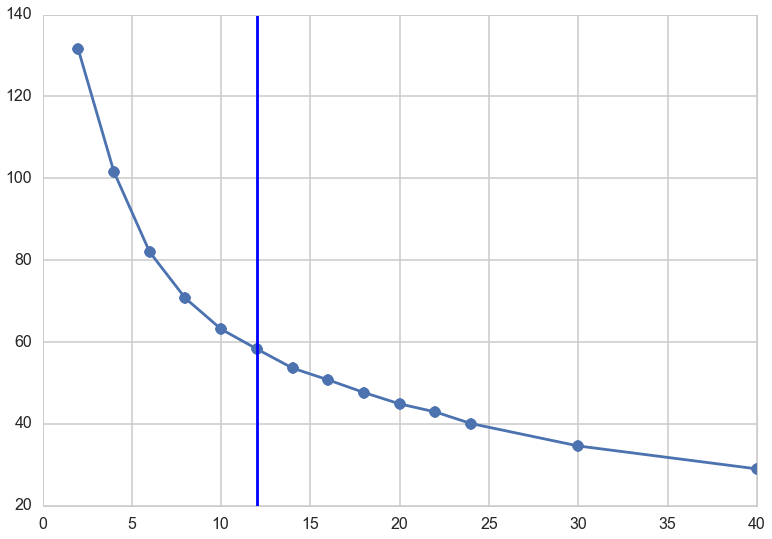

In [112]:
#elbow method for finding k
plt.plot(keylist, vallist, 'o-')
plt.axvline(12)

In [109]:
#https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/
#https://www.quora.com/How-can-we-choose-a-good-K-for-K-means-clustering   
def Wk(mu, clusters):
    K = len(mu)
    return sum([np.linalg.norm(mu[i]-c)**2/(2*len(c)) \
               for i in range(K) for c in clusters[i]])

def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)

def gap_statistic(X):
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(1,10)
    Wks = np.zeros(len(ks))
    Wkbs = np.zeros(len(ks))
    sk = np.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = np.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([random.uniform(xmin,xmax),
                          random.uniform(ymin,ymax)])
            Xb = np.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = np.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*np.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

ks, logWks, logWkbs, sk = gap_statistic(data)

NameError: global name 'find_centers' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty="l1")
clflog, Xt, yt, Xt, yt = do_classify(clf, {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] }, dftouse, lcols, u'RESP', 1, reuse_split=reuse_split)